<a href="https://colab.research.google.com/github/jeanlucjackson/w266_final_project/blob/main/code/evaluation/analyze_evaluations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Google Drive

In [8]:
from os import listdir
from os.path import isfile, join

import csv
import json
from pprint import pprint

import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [2]:
# This cell will authenticate you and mount your Drive in the Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
inference_root = "/content/drive/MyDrive/w266 NLP Final Project/Predictions/"
evaluation_root = "/content/drive/MyDrive/w266 NLP Final Project/Evaluation/"

# Load Results

## From `evaluation_dict`

In [4]:
# Standard filename for `evaluation_dict` saved in Google Drive
filename = join(evaluation_root, "evaluation_dict.json")

# Read JSON into dictionary
with open(filename) as json_file:
    evaluation_dict = json.load(json_file)

In [5]:
# Separate LISTS of results from CALCULATED AVERAGES results
series_dict = {}
value_dict = {}

# Loop through datasets
for dataset, metrics in evaluation_dict.items():
  
  # Loop through metrics and separate "_series" items
  for metric, value in metrics.items():
    
    # If it's a "series" item, add to `series_dict`
    if metric.split('_')[-1].strip() == 'series':

      # If this dataset does not yet exist in `series_dict`, add it:
      if not series_dict.get(dataset):
        series_dict.update(
            {dataset: {metric: value}}
        )
      # If this dataset already exists in `series_dict`, add metric to it:
      else:
        series_dict[dataset].update(
            {metric: value}
        )

    # If not a "series" item then it's a calculated value
    else:

      # If this dataset does not yet exist in `value_dict`, add it:
      if not value_dict.get(dataset):
        value_dict.update(
            {dataset: {metric: value}}
        )
      # If this dataset already exists in `value_dict`, add metric to it:
      else:
        value_dict[dataset].update(
            {metric: value}
        )


In [6]:
# for k, v in series_dict.items():
#   print(k)
#   print('    ', end='')
#   for k, v in v.items():
#     print(f"{k}: ({len(v)})", end=' ')
#   print()

In [7]:
# for k, v in value_dict.items():
#   print(k)
#   print('    ', end='')
#   for k, v in v.items():
#     print(f"{k}: {v}", end=' ')
#   print()

In [8]:
# Load value_dict into DataFrame
value_df = pd.DataFrame.from_dict(value_dict, orient='index')
print(f"{value_df.shape[0]} datasets and {value_df.shape[1]} metrics")

value_df = value_df.reset_index()\
                       .rename(columns={'index': 'filename'})

# Parse filename into metadata columns
value_df['base_model'] = value_df.apply(lambda row: row['filename'].split('.')[1], axis=1)
value_df['trained_on'] = value_df.apply(lambda row: row['filename'].split('.')[2], axis=1)
value_df['tested_on'] = value_df.apply(lambda row: row['filename'].split('.')[3], axis=1)
value_df['nickname'] = value_df.apply(lambda row: f"{row['base_model'].split('_')[0]}_{row['trained_on']}_{row['tested_on']}", axis=1)

60 datasets and 5 metrics


In [9]:
value_df.columns

Index(['filename', 'use', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum',
       'base_model', 'trained_on', 'tested_on', 'nickname'],
      dtype='object')

In [10]:
value_df.head()

,filename,use,rouge1,rouge2,rougeL,rougeLsum,base_model,trained_on,tested_on,nickname
0,predictions.T5_base_pt_long.nq.nq.csv,"[0.7509668469429016, 0.8849086761474609, 0.789...","[0.5882352941176471, 0.75, 0.75, 0.33333333333...","[0.13333333333333333, 0.7142857142857143, 0.57...","[0.5882352941176471, 0.75, 0.75, 0.33333333333...","[0.5882352941176471, 0.75, 0.75, 0.33333333333...",T5_base_pt_long,nq,nq,T5_nq_nq
1,predictions.T5_base_pt_long.nq.squad.csv,"[0.6007516384124756, 0.7093251943588257, 0.721...","[0.5714285714285713, 0.3333333333333333, 0.470...","[0.4210526315789474, 0.0, 0.26666666666666666,...","[0.5714285714285713, 0.3333333333333333, 0.470...","[0.5714285714285713, 0.3333333333333333, 0.470...",T5_base_pt_long,nq,squad,T5_nq_squad
2,predictions.T5_base_pt_long.triviaqa.squad.csv,"[0.7112787961959839, 0.3433218002319336, 0.747...","[0.2105263157894737, 0.2, 0.5, 0.16, 0.4242424...","[0.11764705882352941, 0.0, 0.4444444444444444,...","[0.2105263157894737, 0.2, 0.5, 0.08, 0.1818181...","[0.2105263157894737, 0.2, 0.5, 0.08, 0.1818181...",T5_base_pt_long,triviaqa,squad,T5_triviaqa_squad
3,predictions.T5_base_pt_long.nq.quac.csv,"[0.548034131526947, 0.070818230509758, 0.32918...","[0.2105263157894737, 0.0, 0.0, 0.0, 0.28571428...","[0.11764705882352941, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.2105263157894737, 0.0, 0.0, 0.0, 0.28571428...","[0.2105263157894737, 0.0, 0.0, 0.0, 0.28571428...",T5_base_pt_long,nq,quac,T5_nq_quac
4,predictions.T5_base_pt_long.nq.triviaqa.csv,"[0.6562420725822449, 0.4138485789299011, 0.270...","[0.34782608695652173, 0.22222222222222224, 0.3...","[0.09523809523809525, 0.0, 0.0, 0.0, 0.0, 0.28...","[0.17391304347826086, 0.11111111111111112, 0.2...","[0.17391304347826086, 0.11111111111111112, 0.2...",T5_base_pt_long,nq,triviaqa,T5_nq_triviaqa


In [11]:
value_df.groupby('trained_on').size()

trained_on
amalgam     12
nq          12
quac        12
squad       12
triviaqa    12
dtype: int64

In [12]:
value_df.groupby('tested_on').size()

tested_on
nq          15
quac        15
squad       15
triviaqa    15
dtype: int64

## From `evaluation_database`

In [4]:
filename = join(evaluation_root, "evaluation_database.json")

# Read JSON into dataframe
evaluation_db_df = pd.read_json(filename)

In [5]:
evaluation_db_df.shape

(429435, 19)

In [54]:
evaluation_db_df.groupby(['prediction_set', 'nickname']).size()

prediction_set                                             nickname              
predictions.T5_base_pt_long.amalgam.nq.csv                 T5_amalgam_nq              2356
predictions.T5_base_pt_long.amalgam.quac.csv               T5_amalgam_quac            5868
predictions.T5_base_pt_long.amalgam.squad.csv              T5_amalgam_squad          10570
predictions.T5_base_pt_long.amalgam.triviaqa.csv           T5_amalgam_triviaqa        9835
predictions.T5_base_pt_long.nq.nq.csv                      T5_nq_nq                   2356
predictions.T5_base_pt_long.nq.quac.csv                    T5_nq_quac                 5868
predictions.T5_base_pt_long.nq.squad.csv                   T5_nq_squad               10570
predictions.T5_base_pt_long.nq.triviaqa.csv                T5_nq_triviaqa             9835
predictions.T5_base_pt_long.quac.nq.csv                    T5_quac_nq                 2356
predictions.T5_base_pt_long.quac.quac.csv                  T5_quac_quac               5868
predicti

In [6]:
evaluation_db_df.head()

,prediction_set,base_model,trained_on,tested_on,nickname,hyperparameter,target,prediction,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
0,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},what was the real name of saudi arabia,what is the name of the new saudi kingdom,0.000000,0.588235,0.133333,0.588235,0.588235,0.459259,0.907339,0.912351,0.909838,0.172651,0.750967
1,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},whats the most liked picture on instagram 2018,what is the most liked picture on instagram,0.680375,0.750000,0.714286,0.750000,0.750000,0.864796,0.947524,0.917478,0.932259,0.334462,0.884909
2,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},where does the movie proof of life take place,where does the movie adol take place,0.367415,0.750000,0.571429,0.750000,0.750000,0.669192,0.918053,0.903542,0.910740,-0.815040,0.789266
3,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},where is net profit on the balance sheet,where does net profit come from in a financial...,0.000000,0.333333,0.125000,0.333333,0.333333,0.311653,0.846695,0.865777,0.856129,0.047884,0.728012
4,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},when was fingerprinting first used by the police,when did fingerprint analysis become a common ...,0.000000,0.125000,0.000000,0.125000,0.125000,0.125000,0.841615,0.808970,0.824970,0.092736,0.632561


In [7]:
# Validate database

assert evaluation_db_df.isnull().values.any() == False, 'Missing values'

evaluation_db_df[(evaluation_db_df.prediction_set == 'predictions.bart_base_pt_long.amalgam.quac.beams.csv')]

# datasets = evaluation_db_df.prediction_set.tolist()
# for ds in datasets:
# loop through and check if each dataset has any null values

,prediction_set,base_model,trained_on,tested_on,nickname,hyperparameter,target,prediction,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
423567,predictions.bart_base_pt_long.amalgam.quac.bea...,bart,amalgam,quac,bart_amalgam_quac_hyp,"{'defaults': False, 'max_length': 50, 'beams':...",Did Jimmy learn a lesson at West Ham United?,How did Greaves feel about the move to Upton P...,0.00000,0.105263,0.000000,0.105263,0.105263,0.099010,0.762111,0.773457,0.767742,-1.011404,0.299404
423568,predictions.bart_base_pt_long.amalgam.quac.bea...,bart,amalgam,quac,bart_amalgam_quac_hyp,"{'defaults': False, 'max_length': 50, 'beams':...",What do you find interesting about the article?,Does she have any siblings?,0.00000,0.000000,0.000000,0.000000,0.000000,0.057471,0.709488,0.678160,0.693470,-2.053014,0.123530
423569,predictions.bart_base_pt_long.amalgam.quac.bea...,bart,amalgam,quac,bart_amalgam_quac_hyp,"{'defaults': False, 'max_length': 50, 'beams':...",What number album was You Fail Me?,Are there any other interesting aspects about ...,0.00000,0.000000,0.000000,0.000000,0.000000,0.060976,0.653352,0.665317,0.659280,-1.333339,0.046829
423570,predictions.bart_base_pt_long.amalgam.quac.bea...,bart,amalgam,quac,bart_amalgam_quac_hyp,"{'defaults': False, 'max_length': 50, 'beams':...",Did she win any awards in 2008?,Did she win any other races?,0.37685,0.615385,0.545455,0.615385,0.615385,0.612658,0.885268,0.845009,0.864671,-0.446314,0.617134
423571,predictions.bart_base_pt_long.amalgam.quac.bea...,bart,amalgam,quac,bart_amalgam_quac_hyp,"{'defaults': False, 'max_length': 50, 'beams':...",Who did Janet Gaynor marry in 1939?,Did she marry Gilbert Adrian?,0.00000,0.333333,0.000000,0.333333,0.333333,0.192308,0.819753,0.773792,0.796109,-1.178912,0.335696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,predictions.bart_base_pt_long.amalgam.quac.bea...,bart,amalgam,quac,bart_amalgam_quac_hyp,"{'defaults': False, 'max_length': 50, 'beams':...",When was their last race against each other?,Did Poulidor win the Tour de France?,0.00000,0.000000,0.000000,0.000000,0.000000,0.056180,0.667599,0.685510,0.676436,-1.251500,0.318763
429431,predictions.bart_base_pt_long.amalgam.quac.bea...,bart,amalgam,quac,bart_amalgam_quac_hyp,"{'defaults': False, 'max_length': 50, 'beams':...",Did any single on that album make the charts?,How did the Seekers do on the charts?,0.00000,0.470588,0.133333,0.470588,0.470588,0.516274,0.810590,0.803923,0.807243,-1.227580,0.357405
429432,predictions.bart_base_pt_long.amalgam.quac.bea...,bart,amalgam,quac,bart_amalgam_quac_hyp,"{'defaults': False, 'max_length': 50, 'beams':...",When did Nick first get into music?,When did Nick Carter begin his acting career?,0.00000,0.400000,0.307692,0.400000,0.400000,0.550617,0.821715,0.851532,0.836358,-0.521757,0.658968
429433,predictions.bart_base_pt_long.amalgam.quac.bea...,bart,amalgam,quac,bart_amalgam_quac_hyp,"{'defaults': False, 'max_length': 50, 'beams':...",What office was she trying to get?,When did Pirro announce she would run against ...,0.00000,0.117647,0.000000,0.117647,0.117647,0.120482,0.694288,0.730957,0.712151,-1.433834,0.301291


In [30]:
evaluation_db_df[['nickname', 'rougeL', 'bleu', 'bleurt', 'bertscore-f1', 'meteor']].describe()

,rougeL,bleu,bleurt,bertscore-f1,meteor
count,286290.000000,286290.000000,286290.000000,286290.000000,286290.000000
mean,0.296292,0.045246,-0.859364,0.790286,0.276394
std,0.224311,0.151078,0.613867,0.079507,0.227599
min,0.000000,0.000000,-2.354500,0.443573,0.000000
25%,0.133333,0.000000,-1.329566,0.733248,0.103093
50%,0.250000,0.000000,-0.950615,0.784176,0.199005
75%,0.421053,0.000000,-0.482934,0.842690,0.399306
max,1.000000,1.000000,1.089873,1.000000,0.999937


# Metric Analysis



In [21]:
evaluation_db_df.columns

Index(['prediction_set', 'base_model', 'trained_on', 'tested_on', 'nickname',
       'hyperparameter', 'target', 'prediction', 'bleu', 'rouge1', 'rouge2',
       'rougeL', 'rougeLsum', 'meteor', 'bertscore-precision',
       'bertscore-recall', 'bertscore-f1', 'bleurt', 'use'],
      dtype='object')

In [25]:
use_metrics = [
    'rougeL',
    'bleu',
    'bleurt',
    'meteor',
    'bertscore-f1',
    'use'
]

keep_columns = [
    'nickname',
    'base_model',
    'trained_on',
    'tested_on',
    'target',
    'prediction'
] + use_metrics

In [26]:
evaluation_db_df[keep_columns].head()

,nickname,base_model,trained_on,tested_on,target,prediction,rougeL,bleu,bleurt,meteor,bertscore-f1
0,T5_nq_nq,T5,nq,nq,what was the real name of saudi arabia,what is the name of the new saudi kingdom,0.588235,0.000000,0.172651,0.459259,0.909838
1,T5_nq_nq,T5,nq,nq,whats the most liked picture on instagram 2018,what is the most liked picture on instagram,0.750000,0.680375,0.334462,0.864796,0.932259
2,T5_nq_nq,T5,nq,nq,where does the movie proof of life take place,where does the movie adol take place,0.750000,0.367415,-0.815040,0.669192,0.910740
3,T5_nq_nq,T5,nq,nq,where is net profit on the balance sheet,where does net profit come from in a financial...,0.333333,0.000000,0.047884,0.311653,0.856129
4,T5_nq_nq,T5,nq,nq,when was fingerprinting first used by the police,when did fingerprint analysis become a common ...,0.125000,0.000000,0.092736,0.125000,0.824970


In [30]:
cols = [
    'nickname',
    'base_model',
    'trained_on',
    'tested_on'
] + use_metrics

metric_df = evaluation_db_df[cols]
metric_df.head()

,nickname,base_model,trained_on,tested_on,rougeL,bleu,bleurt,meteor,bertscore-f1
0,T5_nq_nq,T5,nq,nq,0.588235,0.000000,0.172651,0.459259,0.909838
1,T5_nq_nq,T5,nq,nq,0.750000,0.680375,0.334462,0.864796,0.932259
2,T5_nq_nq,T5,nq,nq,0.750000,0.367415,-0.815040,0.669192,0.910740
3,T5_nq_nq,T5,nq,nq,0.333333,0.000000,0.047884,0.311653,0.856129
4,T5_nq_nq,T5,nq,nq,0.125000,0.000000,0.092736,0.125000,0.824970


# left off here

In [23]:
evaluation_db_df.head(1)

,prediction_set,base_model,trained_on,tested_on,nickname,hyperparameter,target,prediction,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
0,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},what was the real name of saudi arabia,what is the name of the new saudi kingdom,0.0,0.588235,0.133333,0.588235,0.588235,0.459259,0.907339,0.912351,0.909838,0.172651,0.750967


In [24]:
default_hyp_rows = [row['defaults'] for row in evaluation_db_df.hyperparameter]
default_hyp_rows[:3]

[True, True, True]

In [30]:
data_default_hyp = evaluation_db_df[default_hyp_rows]
print(data_default_hyp.shape)
data_default_hyp.head(2)

(286290, 19)


,prediction_set,base_model,trained_on,tested_on,nickname,hyperparameter,target,prediction,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
0,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},what was the real name of saudi arabia,what is the name of the new saudi kingdom,0.000000,0.588235,0.133333,0.588235,0.588235,0.459259,0.907339,0.912351,0.909838,0.172651,0.750967
1,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},whats the most liked picture on instagram 2018,what is the most liked picture on instagram,0.680375,0.750000,0.714286,0.750000,0.750000,0.864796,0.947524,0.917478,0.932259,0.334462,0.884909


In [139]:
evaluation_metrics = ['bleu', 'rougeL', 'meteor', 'bertscore-f1', 'use', 'bleurt']
df = evaluation_db_df[default_hyp_rows]
df = df.groupby(["base_model", "trained_on", 'tested_on']).mean().round(decimals=2)
df

bleu  rouge1  rouge2  rougeL  rougeLsum  \
base_model trained_on tested_on                                            
T5         amalgam    nq         0.16    0.55    0.32    0.52       0.52   
                      quac       0.03    0.26    0.10    0.25       0.25   
                      squad      0.13    0.49    0.27    0.46       0.46   
                      triviaqa   0.06    0.41    0.19    0.35       0.35   
           nq         nq         0.16    0.54    0.32    0.52       0.52   
                      quac       0.00    0.15    0.03    0.15       0.15   
                      squad      0.01    0.36    0.14    0.33       0.33   
                      triviaqa   0.01    0.31    0.12    0.27       0.27   
           quac       nq         0.00    0.15    0.02    0.14       0.14   
                      quac       0.00    0.17    0.04    0.17       0.17   
                      squad      0.00    0.18    0.03    0.17       0.17   
                      triviaqa   0.00    0.12    0.01    0.12       0.12   
           squad      nq         0.01    0.43    0.21    0.41       0.41   
                      quac       0.01    0.19    0.05    0.18       0.18   
                      squad      0.13    0.48    0.27    0.45       0.45   
                      triviaqa   0.02    0.31    0.11    0.27       0.27   
           triviaqa   nq         0.01    0.32    0.13    0.27       0.27   
                      quac       0.00    0.11    0.02    0.10       0.10   
                      squad      0.03    0.29    0.11    0.24       0.24   
                      triviaqa   0.05    0.38    0.16    0.32       0.32   
bart       amalgam    nq         0.20    0.57    0.35    0.55       0.55   
                      quac       0.03    0.24    0.09    0.23       0.23   
                      squad      0.14    0.49    0.28    0.46       0.46   
                      triviaqa   0.08    0.44    0.22    0.37       0.37   
           nq         nq         0.20    0.58    0.36    0.55       0.55   
                      quac       0.00    0.15    0.03    0.15       0.15   
                      squad      0.01    0.35    0.14    0.32       0.32   
                      triviaqa   0.01    0.33    0.13    0.29       0.29   
           quac       nq         0.01    0.33    0.14    0.33       0.33   
                      quac       0.06    0.29    0.14    0.28       0.28   
                      squad      0.03    0.31    0.11    0.29       0.29   
                      triviaqa   0.01    0.22    0.06    0.20       0.20   
           squad      nq         0.01    0.43    0.21    0.41       0.41   
                      quac       0.01    0.19    0.05    0.18       0.18   
                      squad      0.15    0.50    0.29    0.47       0.47   
                      triviaqa   0.02    0.30    0.11    0.26       0.26   
           triviaqa   nq         0.01    0.40    0.20    0.37       0.37   
                      quac       0.00    0.12    0.03    0.11       0.11   
                      squad      0.05    0.35    0.14    0.31       0.31   
                      triviaqa   0.08    0.43    0.22    0.37       0.37   

                                 meteor  bertscore-precision  \
base_model trained_on tested_on                                
T5         amalgam    nq           0.49                 0.86   
                      quac         0.26                 0.79   
                      squad        0.45                 0.87   
                      triviaqa     0.33                 0.84   
           nq         nq           0.49                 0.86   
                      quac         0.11                 0.69   
                      squad        0.26                 0.80   
                      triviaqa     0.19                 0.79   
           quac       nq           0.08                 0.70   
                      quac         0.17                 0.77   
                      squad        0.13                 0.77   
        

In [ ]:
for metric in evaluation_metrics:
  print(metric)
  display(df[metric].sort_values(ascending=False)[:3])
  print('___________________')

In [113]:
example = evaluation_db_df[['target', 'prediction', 'bleu', 'rougeL', 'use']].sample(1)
display(example.bleu.to_string())
display(example.rougeL.to_string())
display(example.use.to_string())
display([word for word in example.target])
display([word for word in example.prediction])

'173550    0.421395'

'173550    0.666667'

'173550    0.797535'

['who has the power to approve or veto legislation constitution']

['who has the power to veto a bill']

128717    0.425008  
128717    0.777778  
128717    0.742065  
['What battle outside Quebec City did British lose in 1760?']  
['What battle did the British lose in 1760?']  





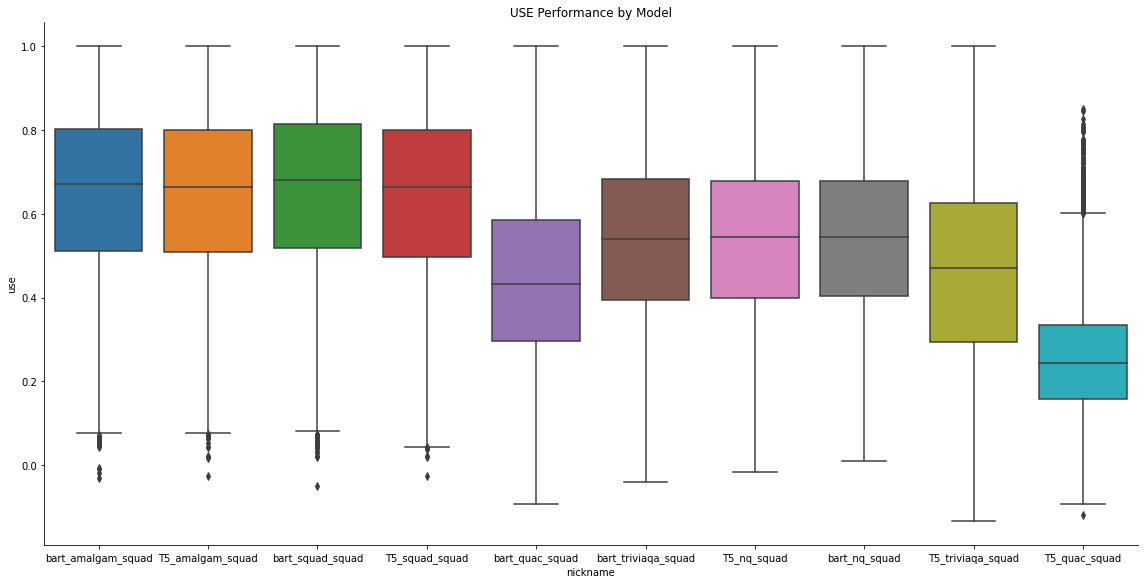

In [58]:
data = data_default_hyp[data_default_hyp.tested_on == 'squad'].sort_values('use', ascending=False)
g = sns.catplot(data=data, kind='box',
                x='nickname', y='use',
                height=8.0, aspect=2.0)
g.set(title='USE Performance by Model')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


nickname
T5_amalgam_nq             AxesSubplot(0.1,0.15;0.8x0.75)
T5_amalgam_quac           AxesSubplot(0.1,0.15;0.8x0.75)
T5_amalgam_squad          AxesSubplot(0.1,0.15;0.8x0.75)
T5_amalgam_triviaqa       AxesSubplot(0.1,0.15;0.8x0.75)
T5_nq_nq                  AxesSubplot(0.1,0.15;0.8x0.75)
T5_nq_quac                AxesSubplot(0.1,0.15;0.8x0.75)
T5_nq_squad               AxesSubplot(0.1,0.15;0.8x0.75)
T5_nq_triviaqa            AxesSubplot(0.1,0.15;0.8x0.75)
T5_quac_nq                AxesSubplot(0.1,0.15;0.8x0.75)
T5_quac_quac              AxesSubplot(0.1,0.15;0.8x0.75)
T5_quac_squad             AxesSubplot(0.1,0.15;0.8x0.75)
T5_quac_triviaqa          AxesSubplot(0.1,0.15;0.8x0.75)
T5_squad_nq               AxesSubplot(0.1,0.15;0.8x0.75)
T5_squad_quac             AxesSubplot(0.1,0.15;0.8x0.75)
T5_squad_squad            AxesSubplot(0.1,0.15;0.8x0.75)
T5_squad_triviaqa         AxesSubplot(0.1,0.15;0.8x0.75)
T5_triviaqa_nq            AxesSubplot(0.1,0.15;0.8x0.75)
T5_triviaqa_quac      

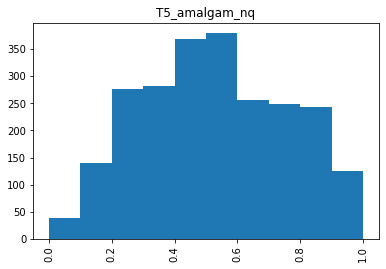

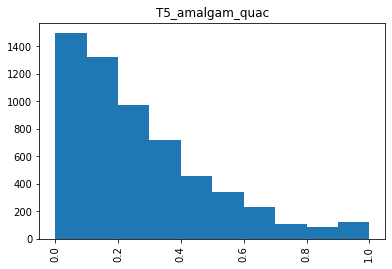

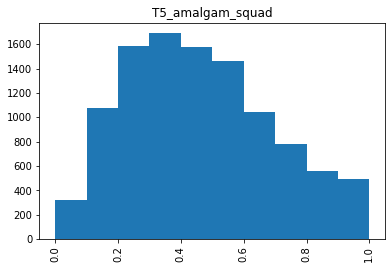

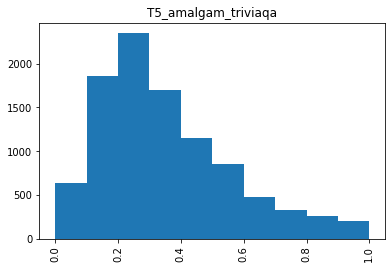

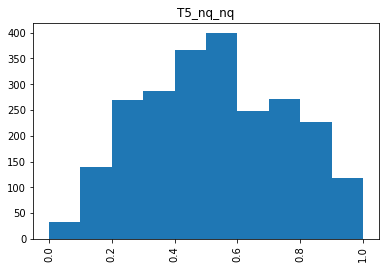

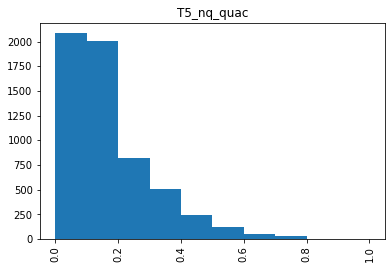

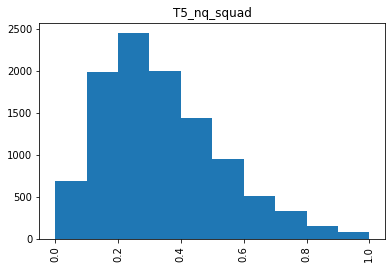

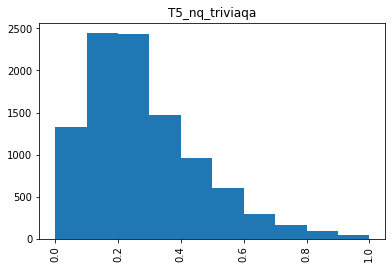

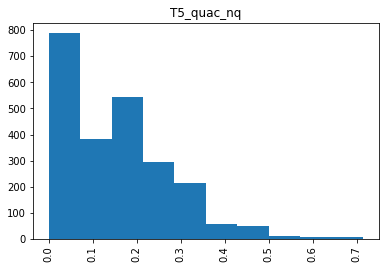

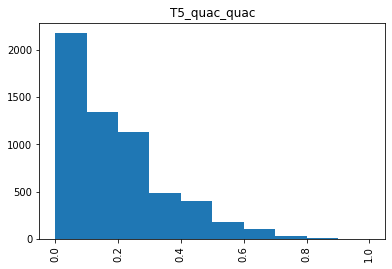

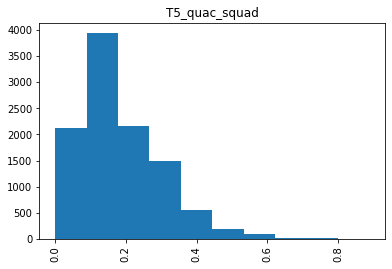

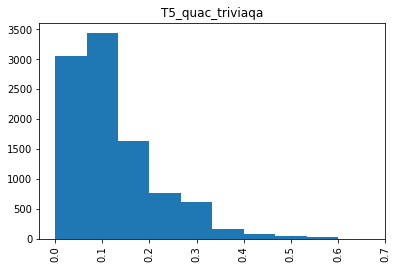

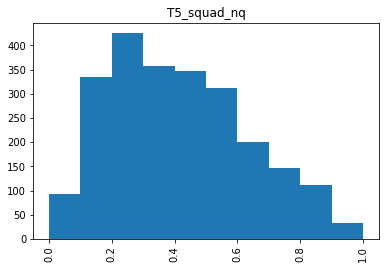

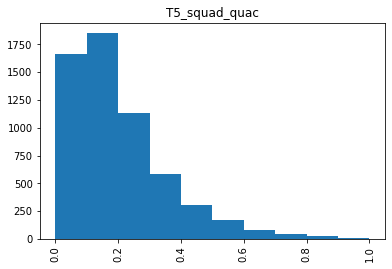

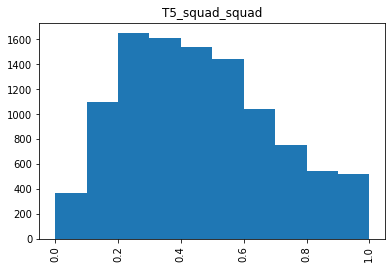

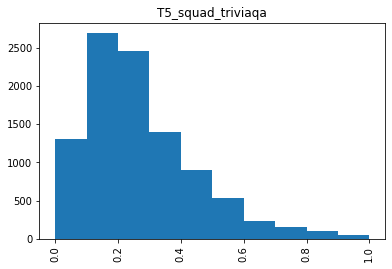

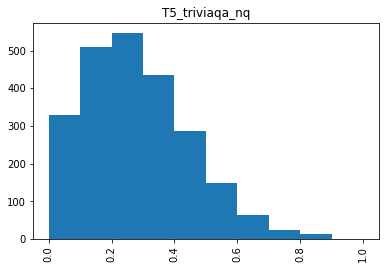

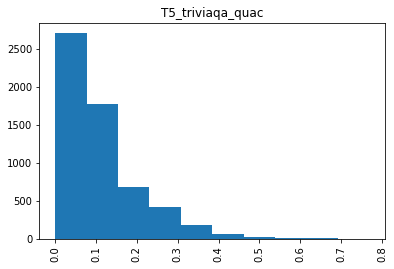

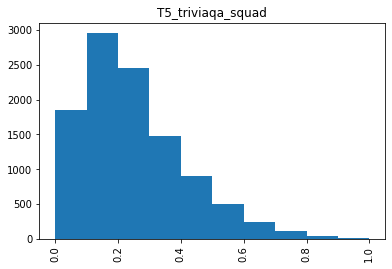

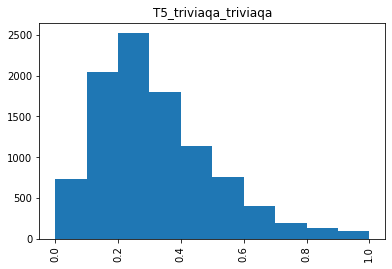

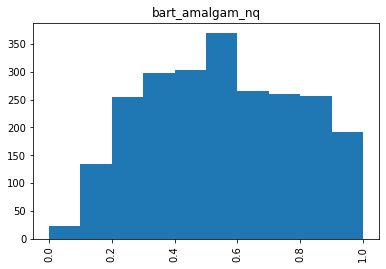

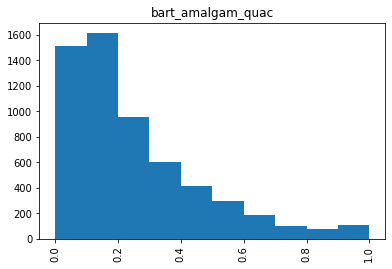

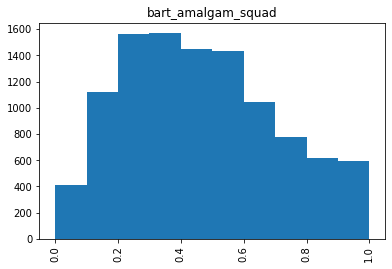

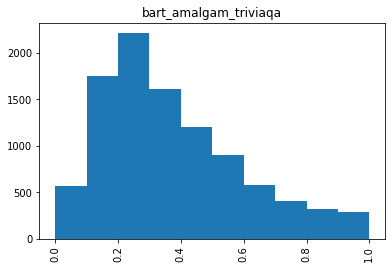

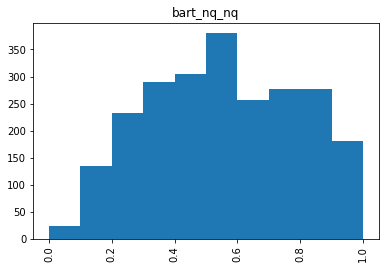

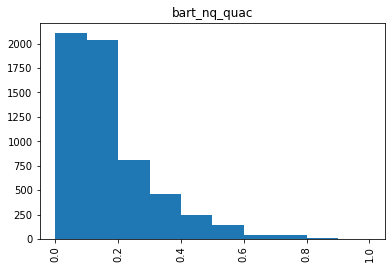

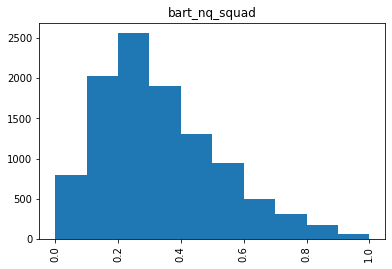

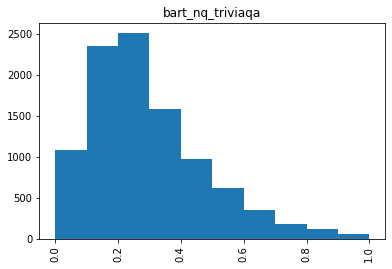

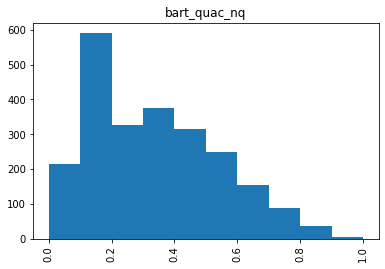

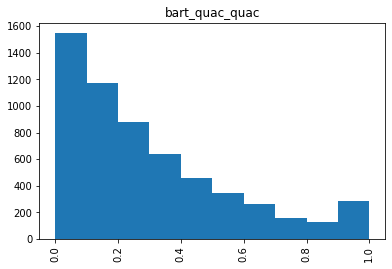

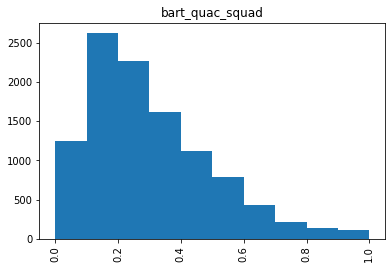

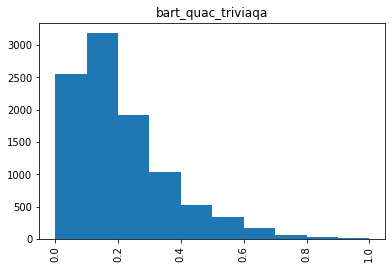

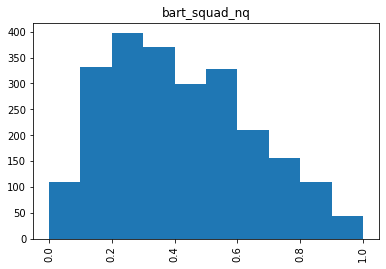

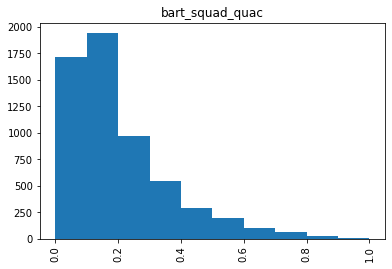

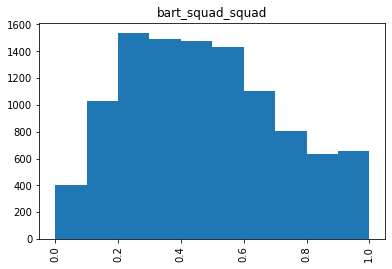

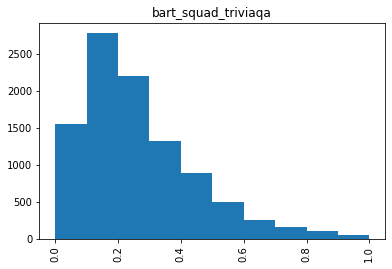

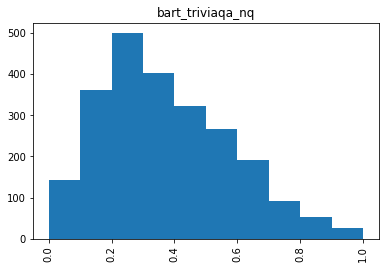

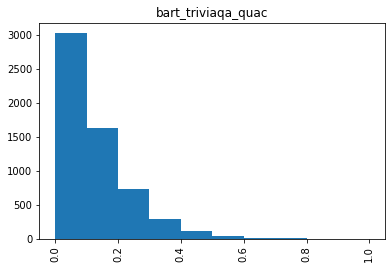

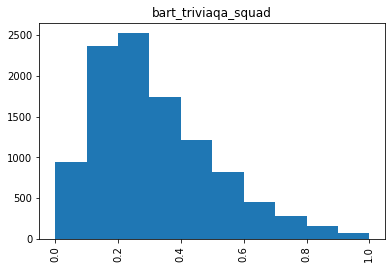

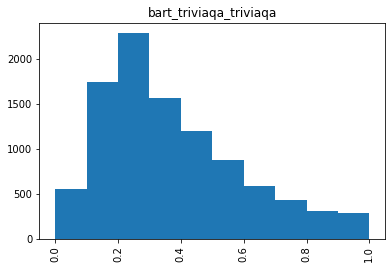

In [34]:
# rouge_fig = value_df[['nickname', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum']]\
#               .set_index('nickname')\
#               .sort_values(by='rougeL', ascending=False)\
#               .plot.bar(figsize=(15,10),
#                       title='ROUGE Scores')\
#               .get_figure()

metric_df[['nickname', 'trained_on', 'tested_on', 'rougeL']]\
    .groupby('nickname')\
    .hist(by='nickname')

# Analyze

## Trained & Tested on Same Dataset

### SQuAD - SQuAD

Analyzing models trained and tested on SQuAD 

In [117]:
squad_squad_df = evaluation_db_df[(evaluation_db_df.trained_on == 'squad') &
                                  (evaluation_db_df.tested_on == 'squad')]
squad_squad_df.groupby('nickname').mean()

,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
nickname,,,,,,,,,,,
T5_squad_squad,0.132327,0.484151,0.268397,0.452071,0.452071,0.455496,0.871368,0.859774,0.864928,-0.318672,0.642209
bart_squad_squad,0.151242,0.503420,0.290294,0.469189,0.469189,0.475335,0.875216,0.865097,0.869541,-0.266942,0.657066
bart_squad_squad_hyp,0.151779,0.503688,0.290672,0.469289,0.469289,0.475808,0.875209,0.865159,0.869578,-0.264393,0.656853


### TriviaQA - TriviaQA

In [ ]:
triviaqa_triviaqa_df = value_df[(value_df.trained_on == 'triviaqa') &
                                (value_df.tested_on == 'triviaqa')]
triviaqa_triviaqa_df

,filename,rouge1,rouge2,rougeL,rougeLsum,bleurt,base_model,trained_on,tested_on,nickname
15,predictions.T5_base_pt_long.triviaqa.triviaqa.csv,"[0.12903225806451615, 0.37499999999999994, 0.2...","[0.0, 0.0, 0.052631578947368425, 0.0, 0.0, 0.2...","[0.12903225806451615, 0.37499999999999994, 0.1...","[0.12903225806451615, 0.37499999999999994, 0.1...",NaN,T5_base_pt_long,triviaqa,triviaqa,T5_triviaqa_triviaqa
31,predictions.bart_base_pt_long.triviaqa.triviaq...,"[0.4761904761904762, 0.7058823529411764, 0.294...","[0.2105263157894737, 0.26666666666666666, 0.12...","[0.380952380952381, 0.3529411764705882, 0.2941...","[0.380952380952381, 0.3529411764705882, 0.2941...",NaN,bart_base_pt_long,triviaqa,triviaqa,bart_triviaqa_triviaqa


### QUAC - QUAC

In [ ]:
quac_quac_df = value_df[(value_df.trained_on == 'quac') &
                        (value_df.tested_on == 'quac')]
quac_quac_df

,filename,rouge1,rouge2,rougeL,rougeLsum,bleurt,base_model,trained_on,tested_on,nickname
13,predictions.T5_base_pt_long.quac.quac.csv,"[0.0, 0.15384615384615385, 0.5454545454545454,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.15384615384615385, 0.36363636363636365...","[0.0, 0.15384615384615385, 0.36363636363636365...",NaN,T5_base_pt_long,quac,quac,T5_quac_quac
21,predictions.bart_base_pt_long.quac.quac.csv,"[0.13333333333333333, 0.15384615384615385, 0.6...","[0.0, 0.0, 0.4, 0.5454545454545454, 0.0, 0.5, ...","[0.13333333333333333, 0.15384615384615385, 0.6...","[0.13333333333333333, 0.15384615384615385, 0.6...",NaN,bart_base_pt_long,quac,quac,bart_quac_quac


### NQ - NQ

In [ ]:
nq_nq_df = value_df[(value_df.trained_on == 'nq') &
                    (value_df.tested_on == 'nq')]
nq_nq_df

## Trained & Tested on Different Datasets

### Tested on SQuAD

In [126]:
on_squad_df = evaluation_db_df[evaluation_db_df.tested_on == 'squad']
on_squad_df.groupby('nickname').mean().sort_values('bleurt', ascending=False)

,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
nickname,,,,,,,,,,,
bart_squad_squad_hyp,0.151779,0.503688,0.290672,0.469289,0.469289,0.475808,0.875209,0.865159,0.869578,-0.264393,0.656853
bart_squad_squad,0.151242,0.503420,0.290294,0.469189,0.469189,0.475335,0.875216,0.865097,0.869541,-0.266942,0.657066
bart_amalgam_squad,0.135813,0.493323,0.279320,0.458580,0.458580,0.460135,0.869009,0.857904,0.862851,-0.308066,0.650529
bart_amalgam_squad_hyp,0.136570,0.493769,0.280218,0.458923,0.458923,0.460821,0.868919,0.858098,0.862914,-0.309597,0.650290
T5_squad_squad,0.132327,0.484151,0.268397,0.452071,0.452071,0.455496,0.871368,0.859774,0.864928,-0.318672,0.642209
T5_amalgam_squad,0.125223,0.487697,0.268768,0.455174,0.455174,0.453043,0.869129,0.856250,0.862051,-0.326483,0.646733
bart_triviaqa_squad_hyp,0.048826,0.353030,0.143065,0.312350,0.312350,0.339249,0.810325,0.825285,0.817091,-0.642930,0.535714
bart_triviaqa_squad,0.047025,0.350678,0.141848,0.310408,0.310408,0.338206,0.809761,0.825226,0.816754,-0.645397,0.535181
bart_nq_squad_hyp,0.014450,0.349272,0.139509,0.322950,0.322950,0.252300,0.797757,0.771389,0.784065,-0.762538,0.540785


### Tested on TriviaQA

In [ ]:
on_triviaqa_df = value_df[value_df.tested_on == 'triviaqa']
on_triviaqa_df

### Tested on QuAC

In [ ]:
on_quac_df = value_df[value_df.tested_on == 'quac']
on_quac_df

### Tested on NQ

In [ ]:
on_nq_df = value_df[value_df.tested_on == 'nq']
on_nq_df

## Top Performers by Metric

In [18]:
top_X_performers = 10

metrics = [
    # 'rouge1',
    # 'rouge2',
    'rougeL',
    'meteor',
    'bleurt',
    # 'bertscore-precision',
    # 'bertscore-recall',
    'bertscore-f1'
]

In [19]:
print(f"Printing top {top_X_performers} performers...\n")

for met in metrics:
  tops = value_df.sort_values(by=met, ascending=False)[['nickname', 'trained_on', 'tested_on', met]]\
                   .head(top_X_performers)
  print(met + ':\n', tops, '\n')

Printing top 10 performers...

rougeL:
               nickname trained_on tested_on  \
32     bart_amalgam_nq    amalgam        nq   
28    bart_triviaqa_nq   triviaqa        nq   
11          T5_quac_nq       quac        nq   
24          bart_nq_nq         nq        nq   
18    bart_squad_squad      squad     squad   
7       T5_squad_squad      squad     squad   
33       T5_amalgam_nq    amalgam        nq   
20        bart_quac_nq       quac        nq   
38  bart_amalgam_squad    amalgam     squad   
0             T5_nq_nq         nq        nq   

                                               rougeL  
32  [0.75, 0.75, 0.7058823529411765, 0.375, 0.25, ...  
28  [0.7368421052631579, 0.11111111111111112, 0.15...  
11  [0.6666666666666666, 0.0, 0.0, 0.1176470588235...  
24  [0.6666666666666665, 0.75, 0.47058823529411764...  
18  [0.6666666666666665, 0.3333333333333333, 0.285...  
7   [0.631578947368421, 0.26666666666666666, 0.285...  
33  [0.625, 0.75, 0.7058823529411765, 0.3333333333

# Plotting

## Metric Averages

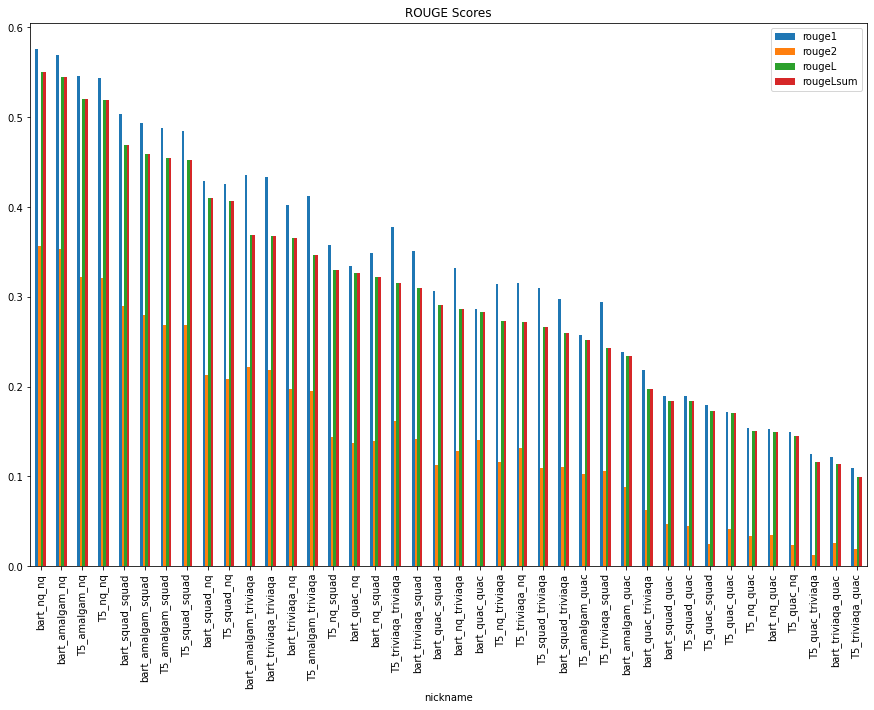

In [ ]:
rouge_fig = value_df[['nickname', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum']]\
              .set_index('nickname')\
              .sort_values(by='rougeL', ascending=False)\
              .plot.bar(figsize=(15,10),
                      title='ROUGE Scores')\
              .get_figure()
rouge_fig

plot_name = join(inference_root, "rouge.png")
rouge_fig.savefig(plot_name, bbox_inches='tight')

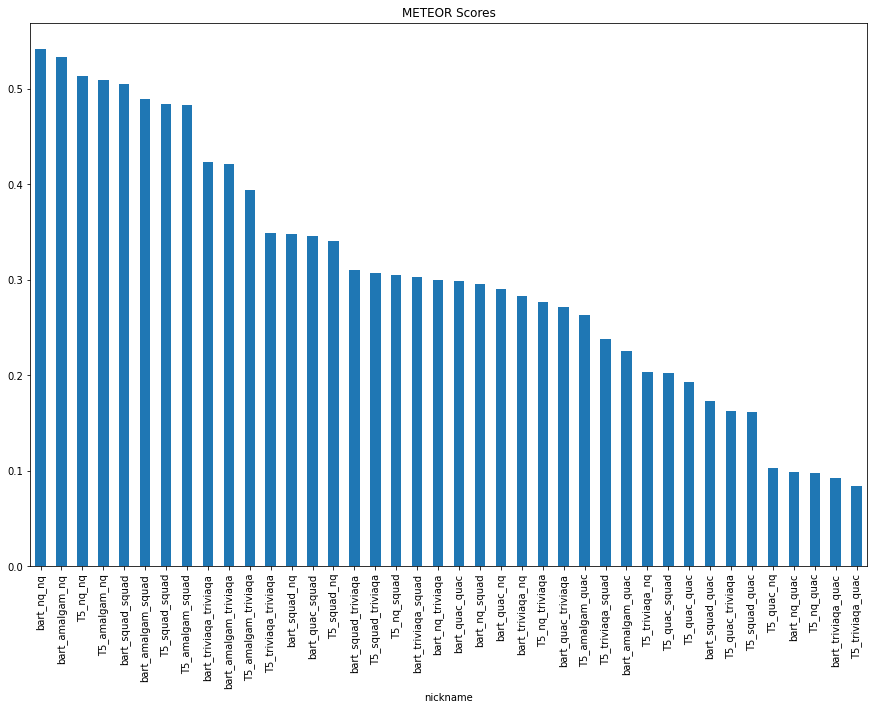

In [ ]:
meteor_fig = value_df[['nickname', 'meteor']]\
              .set_index('nickname')\
              .sort_values(by='meteor', ascending=False)\
              .plot.bar(figsize=(15,10),
                      title='METEOR Scores',
                      legend=False)\
              .get_figure()
meteor_fig

plot_name = join(inference_root, "meteor.png")
meteor_fig.savefig(plot_name, bbox_inches='tight')

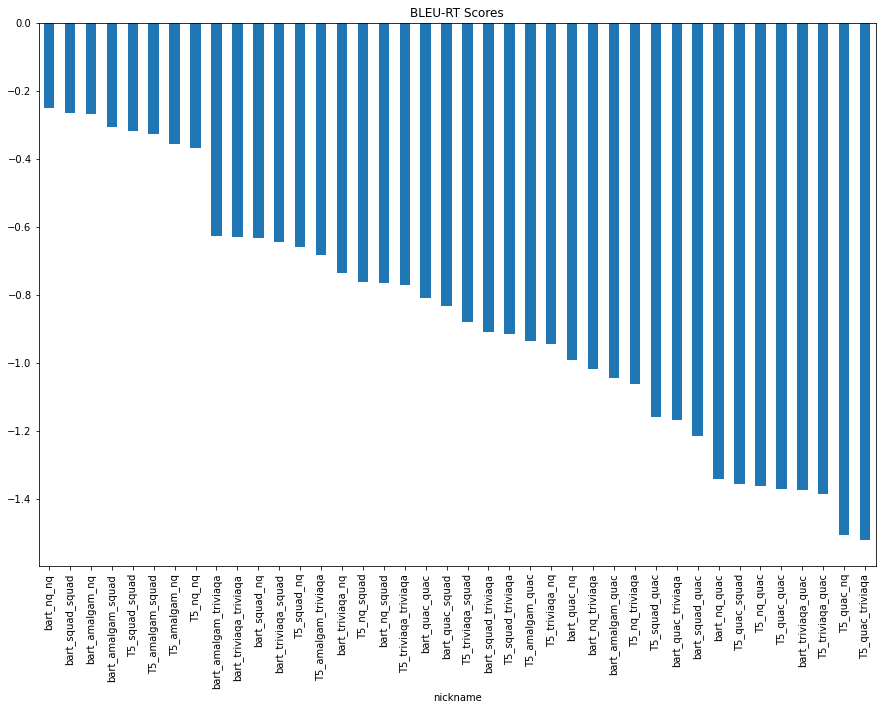

In [ ]:
bleurt_fig = value_df[['nickname', 'bleurt']]\
              .set_index('nickname')\
              .sort_values(by='bleurt', ascending=False)\
              .plot.bar(figsize=(15,10),
                        title='BLEU-RT Scores',
                        legend=False)\
              .get_figure()

bleurt_fig

plot_name = join(inference_root, "bleurt.png")
bleurt_fig.savefig(plot_name, bbox_inches='tight')

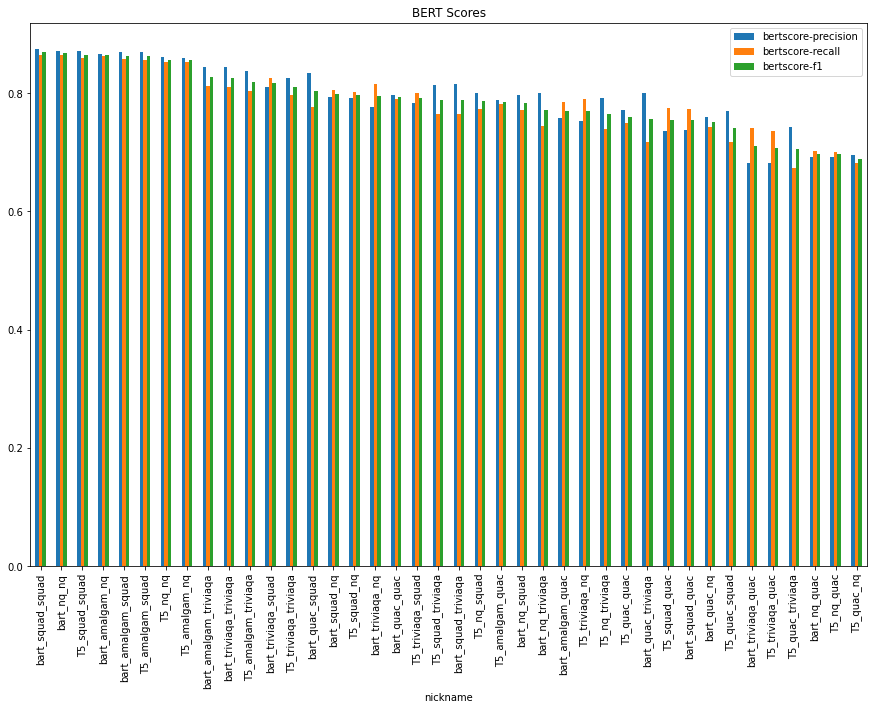

In [ ]:
bertscore_fig = value_df[['nickname', 'bertscore-precision', 'bertscore-recall', 'bertscore-f1']]\
                  .set_index('nickname')\
                  .sort_values(by='bertscore-f1', ascending=False)\
                  .plot.bar(figsize=(15,10),
                            title='BERT Scores')\
                  .get_figure()
bertscore_fig

plot_name = join(inference_root, "bertscore.png")
bertscore_fig.savefig(plot_name, bbox_inches='tight')